Dokonczyc RNN
UNET testowac na innych zbiorach
Transformer
Podstawowe eksperymenty z RSA
Runtime - jak rozwiazac to zagadnienie???
Zestawienie porównania wyników modeli
Latex - zacząć pisać od końca
1. Przeglad aktualnych rozwiazan
2. Implementacja
3. Rezultaty

# RNN for R-peak detection using the pytorch library

In [1]:
import os
import pickle
import numpy as np
import neurokit2 as nk
import torch
import matplotlib.pyplot as plt
from customLib.vis import *
from customLib.preprocess import *
from customLib.peak_detection import *
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.dataset import read_dataset, split_dataset
from customLib.load_ptbxl import load_ptbxl
from customLib.config import apnea_ecg_path, mitbih_path
from models.models import LSTM
from customLib.print_model_parameters import print_model_parameters
# from torchsummary import summary

In [8]:
LSTM_HIDDEN_SIZE = 32
EPOCHS = 50
BATCH_SIZE = 100
LR = 1e-2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# laod and preprocess MITBIH or Apnea dataset
x, y = load_physionet_ecgs(path=mitbih_path, annotation_file_extension="atr", force_new=True, window_in_seconds=10, expand=False, denoise=True)

In [3]:
path = mitbih_path + "\\dataset\\raw"
# x_train, y_train, x_test, y_test, x_val, y_val = split_dataset(path=mitbih_path, x=x, y=y, shuffle=False, split_ratio=0.8, is_validation_set=True)
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(path=path, is_validation_set=True)

x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

In [5]:
num_pos = np.sum(y_train[0])
num_neg = len(y_train[0]) - num_pos
pos_weight = int(num_neg / num_pos / 5)
pos_weight = torch.tensor([17], dtype=torch.float32).to(device)
print(f"Positive label weight (R-peak): {(pos_weight.item()):.5f}")

Positive label weight (R-peak): 17.00000


In [9]:
model = LSTM(input_dim=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR, loss_pos_weight=pos_weight, checkpoint_path="./checkpoints/lstm/raw_ecgs") #input_size == hidden features size (1-lead ECG)
# model.load_state_dict(torch.load(".\\checkpoints\\lstm\\lstm_epoch_50_acc_99.80_f1_0.97.pt"))

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [6]:
print_model_parameters(model)

Layer lstm_1: 8960 parameters
Layer lstm_2: 25088 parameters
Layer dense: 65 parameters
Total trainable params: 34113


 99%|█████████▉| 118/119 [00:21<00:00,  6.16it/s]

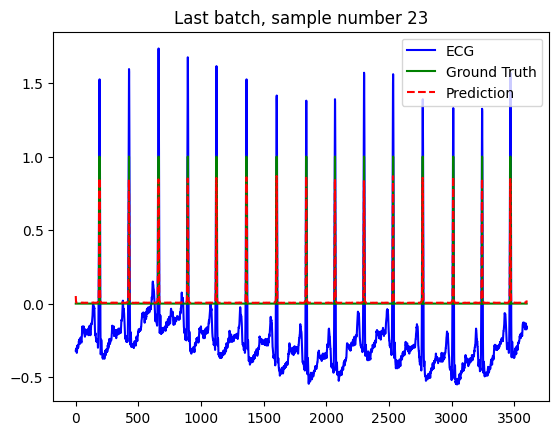

100%|██████████| 119/119 [00:21<00:00,  5.42it/s]


Learning rate:  [0.01]

Train Loss: 0.1641
train Weighted Accuracy: 0.70819
train F1 Score: 0.55491
train TPR: 0.41668
train FPR: 0.00030
train TNR: 0.99970
train FNR: 0.58332



100%|██████████| 20/20 [00:01<00:00, 10.45it/s]



Validation Loss: 0.1284
validation Weighted Accuracy: 0.75597
validation F1 Score: 0.64336
validation TPR: 0.51222
validation FPR: 0.00028
validation TNR: 0.99972
validation FNR: 0.48778

====Epoch [2/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.22it/s]

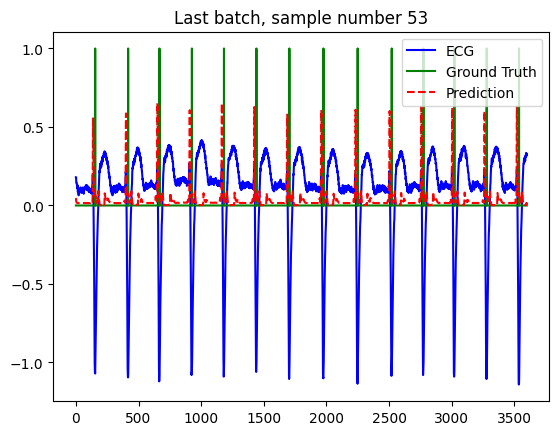

100%|██████████| 119/119 [00:21<00:00,  5.65it/s]


Learning rate:  [0.01]

Train Loss: 0.1513
train Weighted Accuracy: 0.74506
train F1 Score: 0.61740
train TPR: 0.49048
train FPR: 0.00035
train TNR: 0.99965
train FNR: 0.50952



100%|██████████| 20/20 [00:01<00:00, 11.21it/s]



Validation Loss: 0.1309
validation Weighted Accuracy: 0.78580
validation F1 Score: 0.67112
validation TPR: 0.57207
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.42793

====Epoch [3/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.17it/s]

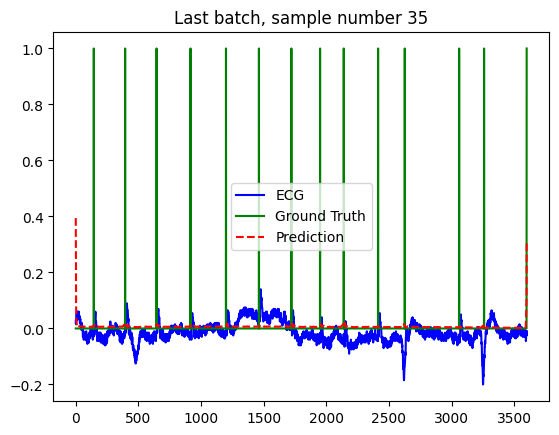

100%|██████████| 119/119 [00:21<00:00,  5.53it/s]


Learning rate:  [0.01]

Train Loss: 0.1024
train Weighted Accuracy: 0.81012
train F1 Score: 0.71421
train TPR: 0.62065
train FPR: 0.00041
train TNR: 0.99959
train FNR: 0.37935



100%|██████████| 20/20 [00:01<00:00, 11.19it/s]



Validation Loss: 0.0713
validation Weighted Accuracy: 0.87821
validation F1 Score: 0.80145
validation TPR: 0.75689
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.24311

====Epoch [4/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.14it/s]

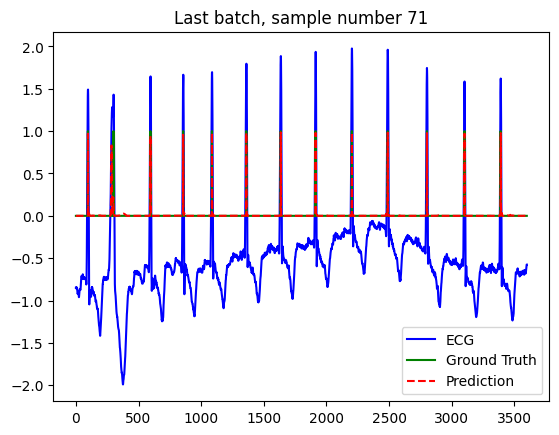

100%|██████████| 119/119 [00:21<00:00,  5.61it/s]


Learning rate:  [0.01]

Train Loss: 0.0694
train Weighted Accuracy: 0.89211
train F1 Score: 0.81472
train TPR: 0.78472
train FPR: 0.00050
train TNR: 0.99950
train FNR: 0.21528



100%|██████████| 20/20 [00:01<00:00, 10.38it/s]



Validation Loss: 0.0628
validation Weighted Accuracy: 0.89301
validation F1 Score: 0.81710
validation TPR: 0.78651
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.21349

====Epoch [5/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.14it/s]

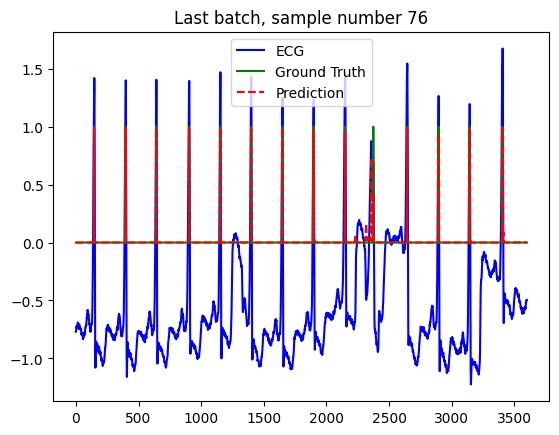

100%|██████████| 119/119 [00:22<00:00,  5.40it/s]


Learning rate:  [0.001]

Train Loss: 0.0608
train Weighted Accuracy: 0.91404
train F1 Score: 0.84611
train TPR: 0.82854
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.17146



100%|██████████| 20/20 [00:02<00:00,  9.67it/s]



Validation Loss: 0.0583
validation Weighted Accuracy: 0.92249
validation F1 Score: 0.83986
validation TPR: 0.84556
validation FPR: 0.00059
validation TNR: 0.99941
validation FNR: 0.15444

====Epoch [6/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.11it/s]

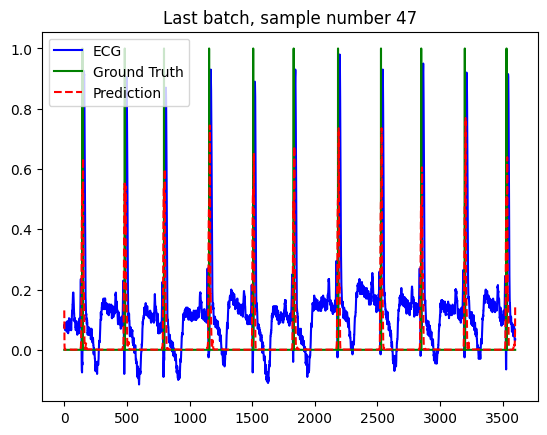

100%|██████████| 119/119 [00:22<00:00,  5.36it/s]


Learning rate:  [0.001]

Train Loss: 0.0557
train Weighted Accuracy: 0.92988
train F1 Score: 0.86665
train TPR: 0.86020
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.13980



100%|██████████| 20/20 [00:01<00:00, 10.74it/s]



Validation Loss: 0.0543
validation Weighted Accuracy: 0.92757
validation F1 Score: 0.86218
validation TPR: 0.85559
validation FPR: 0.00046
validation TNR: 0.99954
validation FNR: 0.14441

====Epoch [7/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  5.91it/s]

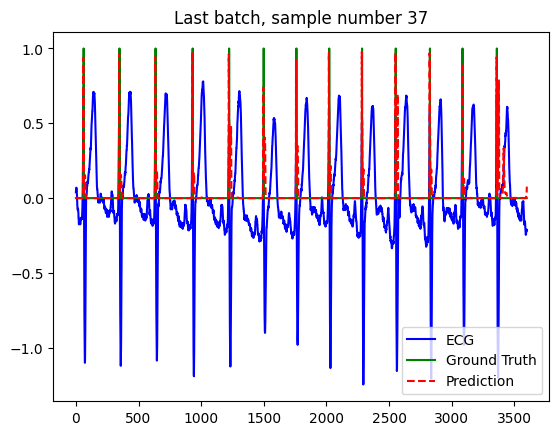

100%|██████████| 119/119 [00:21<00:00,  5.49it/s]


Learning rate:  [0.001]

Train Loss: 0.0548
train Weighted Accuracy: 0.93275
train F1 Score: 0.87077
train TPR: 0.86594
train FPR: 0.00043
train TNR: 0.99957
train FNR: 0.13406



100%|██████████| 20/20 [00:01<00:00, 10.56it/s]



Validation Loss: 0.0536
validation Weighted Accuracy: 0.93056
validation F1 Score: 0.86670
validation TPR: 0.86157
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.13843

====Epoch [8/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.16it/s]

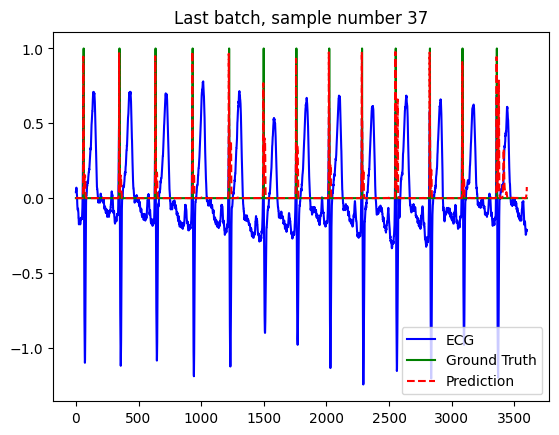

100%|██████████| 119/119 [00:22<00:00,  5.41it/s]


Learning rate:  [0.001]

Train Loss: 0.0541
train Weighted Accuracy: 0.93618
train F1 Score: 0.87433
train TPR: 0.87279
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.12721



100%|██████████| 20/20 [00:01<00:00, 10.36it/s]



Validation Loss: 0.0529
validation Weighted Accuracy: 0.93386
validation F1 Score: 0.87044
validation TPR: 0.86816
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.13184

====Epoch [9/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.17it/s]

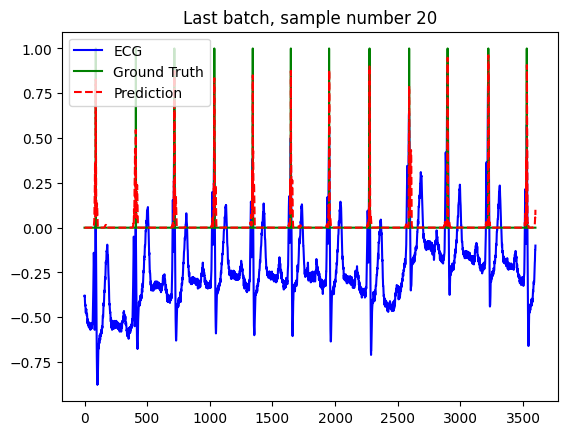

100%|██████████| 119/119 [00:21<00:00,  5.56it/s]


Learning rate:  [0.001]

Train Loss: 0.0535
train Weighted Accuracy: 0.93965
train F1 Score: 0.87807
train TPR: 0.87973
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.12027



100%|██████████| 20/20 [00:01<00:00, 10.57it/s]



Validation Loss: 0.0523
validation Weighted Accuracy: 0.93535
validation F1 Score: 0.87198
validation TPR: 0.87116
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.12884

====Epoch [10/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.02it/s]

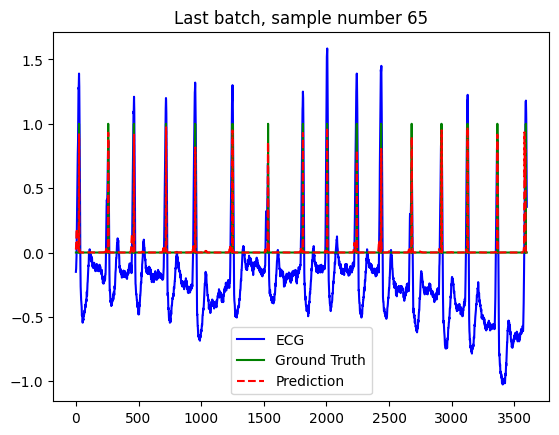

100%|██████████| 119/119 [00:22<00:00,  5.32it/s]


Learning rate:  [0.0001]

Train Loss: 0.0529
train Weighted Accuracy: 0.94270
train F1 Score: 0.88085
train TPR: 0.88584
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.11416



100%|██████████| 20/20 [00:01<00:00, 10.40it/s]



Validation Loss: 0.0518
validation Weighted Accuracy: 0.93797
validation F1 Score: 0.87435
validation TPR: 0.87639
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.12361

====Epoch [11/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.06it/s]

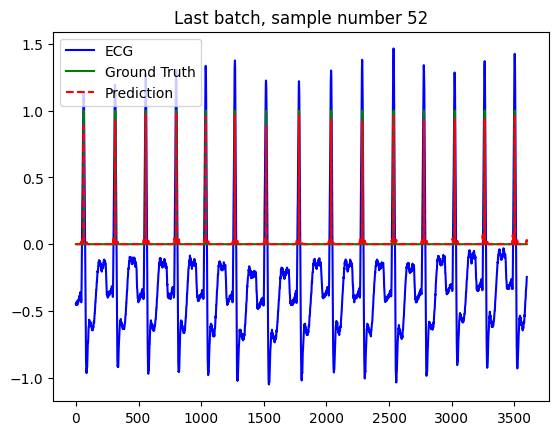

100%|██████████| 119/119 [00:21<00:00,  5.54it/s]


Learning rate:  [0.0001]

Train Loss: 0.0523
train Weighted Accuracy: 0.94388
train F1 Score: 0.88212
train TPR: 0.88821
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.11179



100%|██████████| 20/20 [00:01<00:00, 10.40it/s]



Validation Loss: 0.0516
validation Weighted Accuracy: 0.94323
validation F1 Score: 0.87881
validation TPR: 0.88693
validation FPR: 0.00046
validation TNR: 0.99954
validation FNR: 0.11307

====Epoch [12/50]====


 99%|█████████▉| 118/119 [00:21<00:00,  6.00it/s]

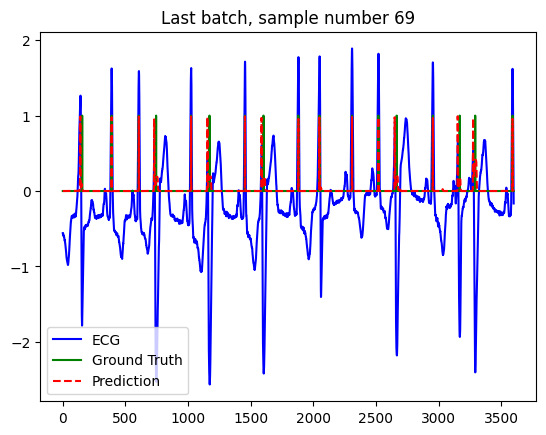

100%|██████████| 119/119 [00:22<00:00,  5.39it/s]


Learning rate:  [0.0001]

Train Loss: 0.0523
train Weighted Accuracy: 0.94485
train F1 Score: 0.88317
train TPR: 0.89014
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10986



100%|██████████| 20/20 [00:01<00:00, 13.10it/s]



Validation Loss: 0.0515
validation Weighted Accuracy: 0.94371
validation F1 Score: 0.87927
validation TPR: 0.88789
validation FPR: 0.00046
validation TNR: 0.99954
validation FNR: 0.11211

====Epoch [13/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.74it/s]

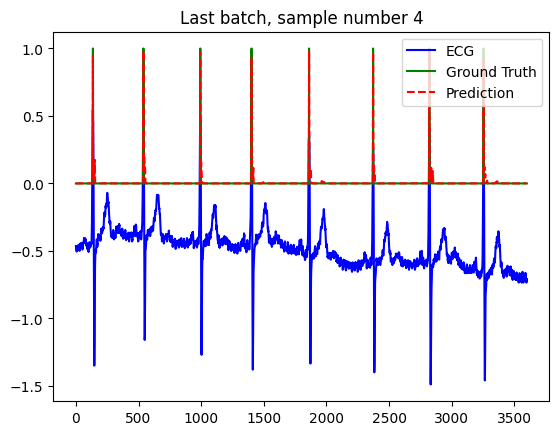

100%|██████████| 119/119 [00:17<00:00,  6.79it/s]


Learning rate:  [0.0001]

Train Loss: 0.0522
train Weighted Accuracy: 0.94517
train F1 Score: 0.88355
train TPR: 0.89078
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10922



100%|██████████| 20/20 [00:01<00:00, 12.58it/s]



Validation Loss: 0.0514
validation Weighted Accuracy: 0.94395
validation F1 Score: 0.87945
validation TPR: 0.88837
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.11163

====Epoch [14/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.79it/s]

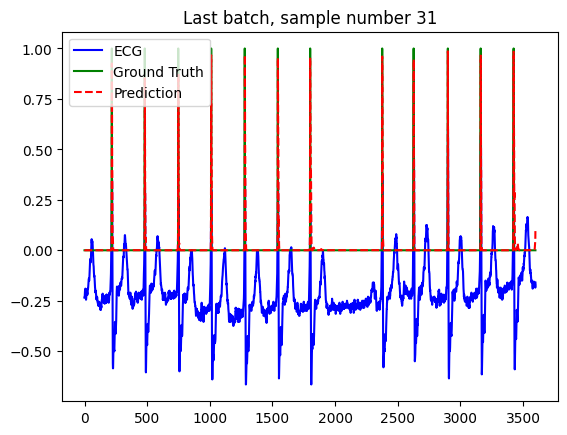

100%|██████████| 119/119 [00:17<00:00,  6.83it/s]


Learning rate:  [0.0001]

Train Loss: 0.0521
train Weighted Accuracy: 0.94554
train F1 Score: 0.88395
train TPR: 0.89152
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10848



100%|██████████| 20/20 [00:01<00:00, 13.16it/s]



Validation Loss: 0.0514
validation Weighted Accuracy: 0.94413
validation F1 Score: 0.87963
validation TPR: 0.88872
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.11128

====Epoch [15/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.74it/s]

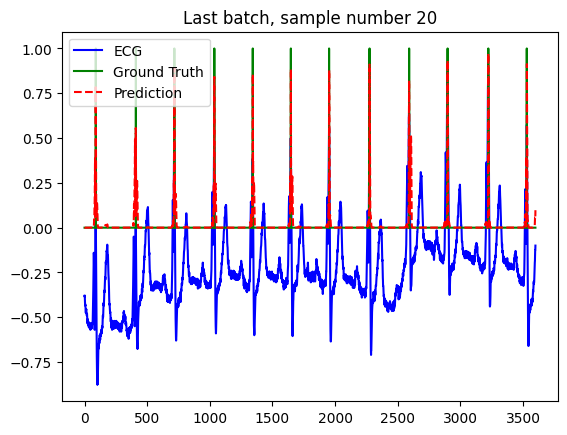

100%|██████████| 119/119 [00:18<00:00,  6.55it/s]


Learning rate:  [0.0001]

Train Loss: 0.0521
train Weighted Accuracy: 0.94598
train F1 Score: 0.88437
train TPR: 0.89240
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10760



100%|██████████| 20/20 [00:01<00:00, 12.99it/s]



Validation Loss: 0.0513
validation Weighted Accuracy: 0.94475
validation F1 Score: 0.88040
validation TPR: 0.88996
validation FPR: 0.00046
validation TNR: 0.99954
validation FNR: 0.11004

====Epoch [16/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.77it/s]

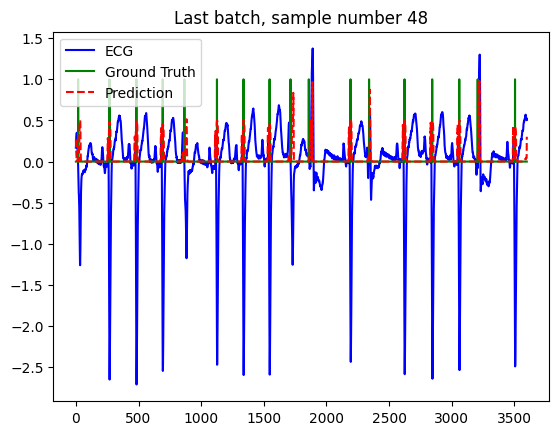

100%|██████████| 119/119 [00:17<00:00,  6.78it/s]


Learning rate:  [0.0001]

Train Loss: 0.0520
train Weighted Accuracy: 0.94624
train F1 Score: 0.88473
train TPR: 0.89292
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10708



100%|██████████| 20/20 [00:01<00:00, 12.54it/s]



Validation Loss: 0.0512
validation Weighted Accuracy: 0.94505
validation F1 Score: 0.88082
validation TPR: 0.89056
validation FPR: 0.00046
validation TNR: 0.99954
validation FNR: 0.10944

====Epoch [17/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.81it/s]

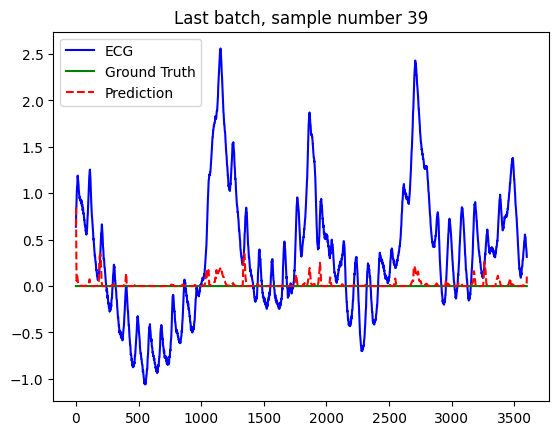

100%|██████████| 119/119 [00:18<00:00,  6.59it/s]


Learning rate:  [0.0001]

Train Loss: 0.0519
train Weighted Accuracy: 0.94663
train F1 Score: 0.88517
train TPR: 0.89371
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10629



100%|██████████| 20/20 [00:01<00:00, 12.85it/s]



Validation Loss: 0.0512
validation Weighted Accuracy: 0.94523
validation F1 Score: 0.88078
validation TPR: 0.89092
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10908

====Epoch [18/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.79it/s]

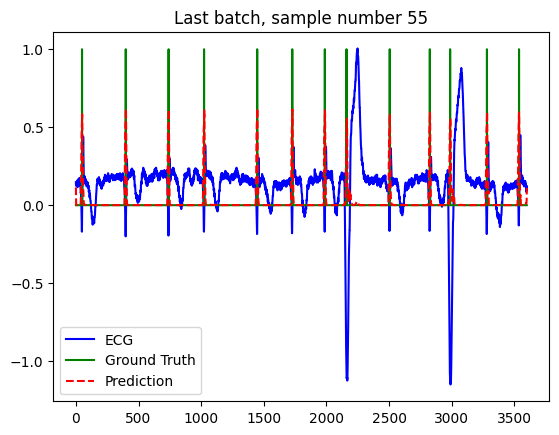

100%|██████████| 119/119 [00:17<00:00,  6.81it/s]


Learning rate:  [0.0001]

Train Loss: 0.0519
train Weighted Accuracy: 0.94688
train F1 Score: 0.88539
train TPR: 0.89421
train FPR: 0.00044
train TNR: 0.99956
train FNR: 0.10579



100%|██████████| 20/20 [00:01<00:00, 12.48it/s]



Validation Loss: 0.0511
validation Weighted Accuracy: 0.94551
validation F1 Score: 0.88101
validation TPR: 0.89148
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10852

====Epoch [19/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.77it/s]

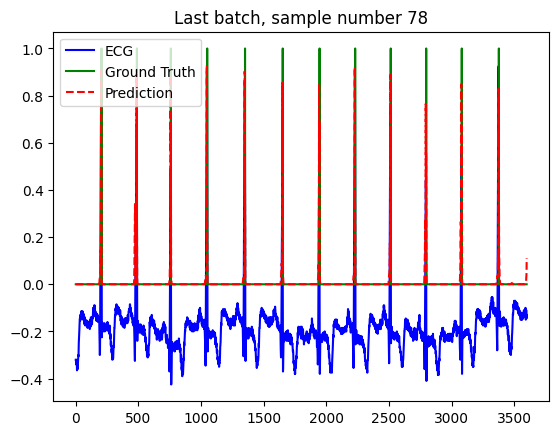

100%|██████████| 119/119 [00:17<00:00,  6.77it/s]


Learning rate:  [0.0001]

Train Loss: 0.0518
train Weighted Accuracy: 0.94732
train F1 Score: 0.88574
train TPR: 0.89508
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10492



100%|██████████| 20/20 [00:01<00:00, 13.14it/s]



Validation Loss: 0.0511
validation Weighted Accuracy: 0.94577
validation F1 Score: 0.88132
validation TPR: 0.89200
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10800

====Epoch [20/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.79it/s]

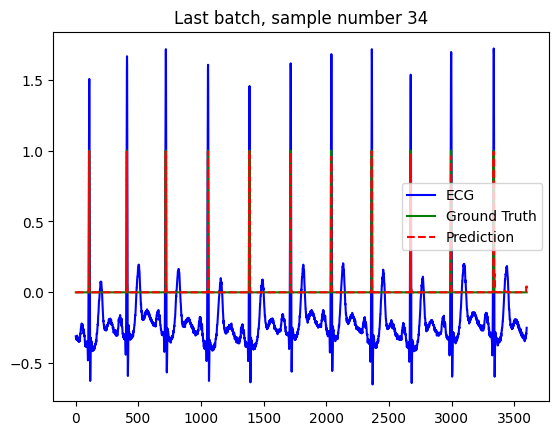

100%|██████████| 119/119 [00:18<00:00,  6.58it/s]


Learning rate:  [0.0001]

Train Loss: 0.0517
train Weighted Accuracy: 0.94763
train F1 Score: 0.88606
train TPR: 0.89571
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10429



100%|██████████| 20/20 [00:01<00:00, 13.03it/s]



Validation Loss: 0.0510
validation Weighted Accuracy: 0.94594
validation F1 Score: 0.88119
validation TPR: 0.89236
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10764

====Epoch [21/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.82it/s]

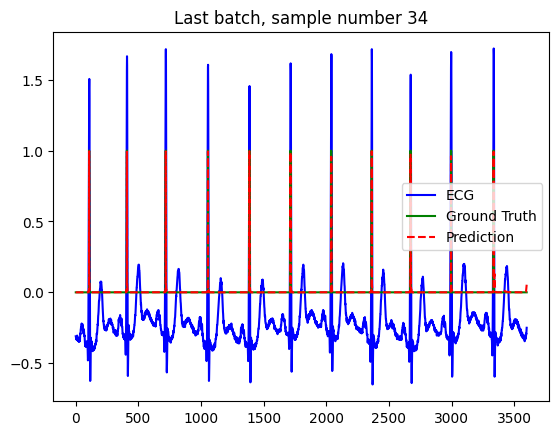

100%|██████████| 119/119 [00:17<00:00,  6.86it/s]


Learning rate:  [0.0001]

Train Loss: 0.0517
train Weighted Accuracy: 0.94796
train F1 Score: 0.88624
train TPR: 0.89637
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10363



100%|██████████| 20/20 [00:01<00:00, 12.48it/s]



Validation Loss: 0.0509
validation Weighted Accuracy: 0.94606
validation F1 Score: 0.88135
validation TPR: 0.89260
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10740

====Epoch [22/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.83it/s]

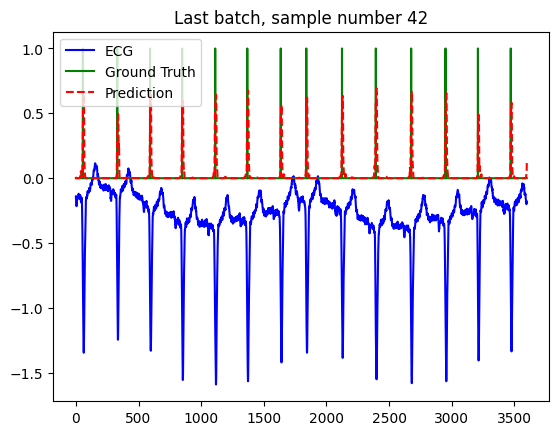

100%|██████████| 119/119 [00:18<00:00,  6.58it/s]


Learning rate:  [0.0001]

Train Loss: 0.0516
train Weighted Accuracy: 0.94823
train F1 Score: 0.88650
train TPR: 0.89691
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10309



100%|██████████| 20/20 [00:01<00:00, 12.44it/s]



Validation Loss: 0.0509
validation Weighted Accuracy: 0.94626
validation F1 Score: 0.88154
validation TPR: 0.89300
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10700

====Epoch [23/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.75it/s]

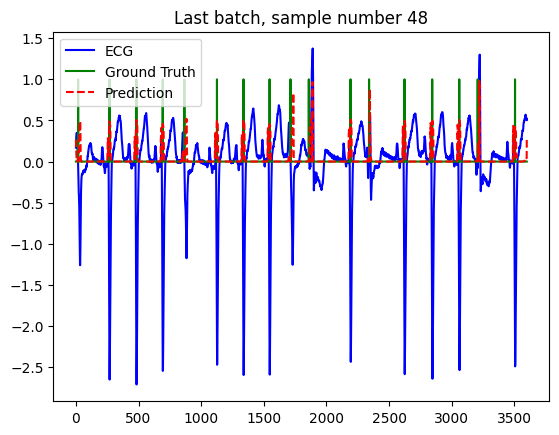

100%|██████████| 119/119 [00:17<00:00,  6.80it/s]


Learning rate:  [0.0001]

Train Loss: 0.0515
train Weighted Accuracy: 0.94825
train F1 Score: 0.88656
train TPR: 0.89696
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10304



100%|██████████| 20/20 [00:01<00:00, 12.31it/s]



Validation Loss: 0.0508
validation Weighted Accuracy: 0.94644
validation F1 Score: 0.88188
validation TPR: 0.89336
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10664

====Epoch [24/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.78it/s]

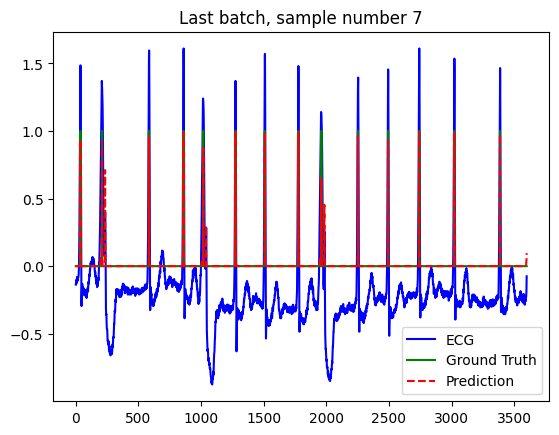

100%|██████████| 119/119 [00:19<00:00,  6.22it/s]


Learning rate:  [0.0001]

Train Loss: 0.0515
train Weighted Accuracy: 0.94854
train F1 Score: 0.88679
train TPR: 0.89753
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10247



100%|██████████| 20/20 [00:02<00:00,  9.85it/s]



Validation Loss: 0.0507
validation Weighted Accuracy: 0.94680
validation F1 Score: 0.88219
validation TPR: 0.89407
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10593

====Epoch [25/50]====


 99%|█████████▉| 118/119 [00:20<00:00,  6.12it/s]

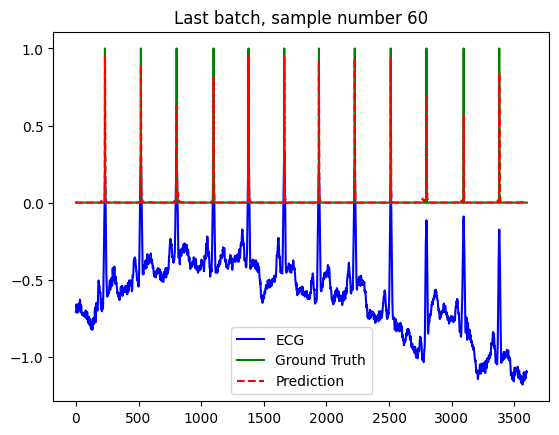

100%|██████████| 119/119 [00:21<00:00,  5.53it/s]


Learning rate:  [0.0001]

Train Loss: 0.0514
train Weighted Accuracy: 0.94886
train F1 Score: 0.88713
train TPR: 0.89817
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10183



100%|██████████| 20/20 [00:01<00:00, 12.28it/s]



Validation Loss: 0.0507
validation Weighted Accuracy: 0.94702
validation F1 Score: 0.88238
validation TPR: 0.89451
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10549

====Epoch [26/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.71it/s]

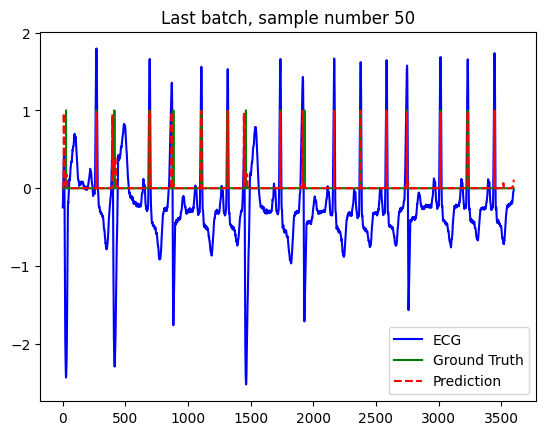

100%|██████████| 119/119 [00:18<00:00,  6.55it/s]


Learning rate:  [0.0001]

Train Loss: 0.0513
train Weighted Accuracy: 0.94903
train F1 Score: 0.88725
train TPR: 0.89850
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10150



100%|██████████| 20/20 [00:01<00:00, 12.88it/s]



Validation Loss: 0.0506
validation Weighted Accuracy: 0.94738
validation F1 Score: 0.88307
validation TPR: 0.89523
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10477

====Epoch [27/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.48it/s]

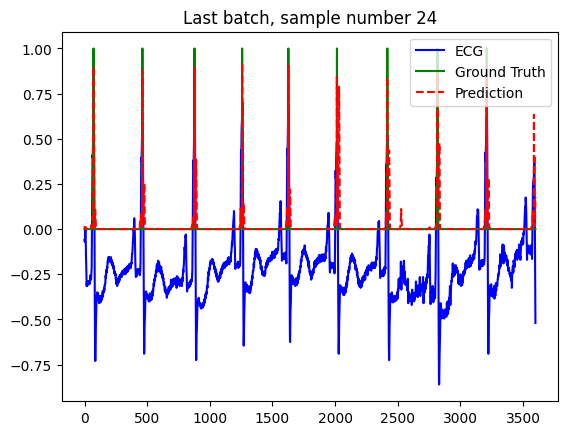

100%|██████████| 119/119 [00:18<00:00,  6.46it/s]


Learning rate:  [0.0001]

Train Loss: 0.0513
train Weighted Accuracy: 0.94939
train F1 Score: 0.88742
train TPR: 0.89923
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10077



100%|██████████| 20/20 [00:01<00:00, 12.93it/s]



Validation Loss: 0.0506
validation Weighted Accuracy: 0.94788
validation F1 Score: 0.88350
validation TPR: 0.89623
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10377

====Epoch [28/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.82it/s]

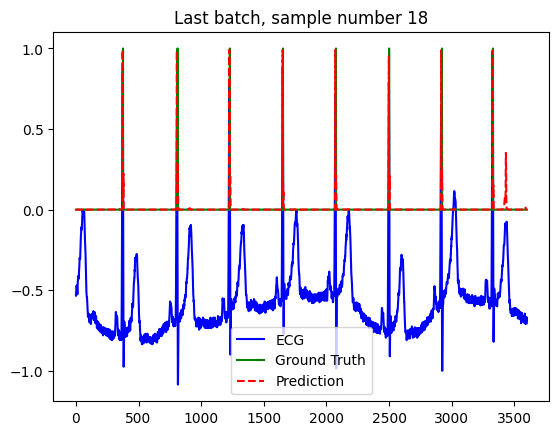

100%|██████████| 119/119 [00:17<00:00,  6.84it/s]


Learning rate:  [0.0001]

Train Loss: 0.0512
train Weighted Accuracy: 0.94968
train F1 Score: 0.88759
train TPR: 0.89982
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.10018



100%|██████████| 20/20 [00:01<00:00, 12.98it/s]



Validation Loss: 0.0505
validation Weighted Accuracy: 0.94818
validation F1 Score: 0.88351
validation TPR: 0.89683
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10317

====Epoch [29/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.75it/s]

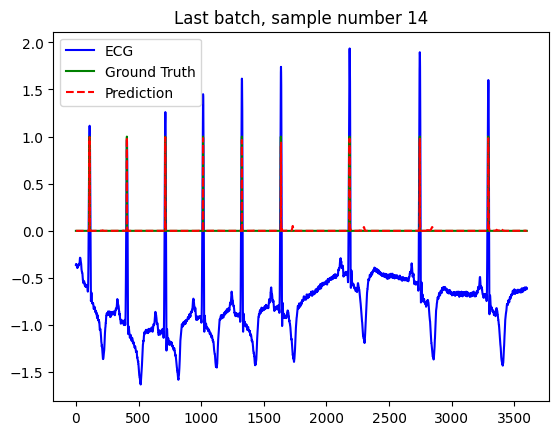

100%|██████████| 119/119 [00:18<00:00,  6.56it/s]


Learning rate:  [0.0001]

Train Loss: 0.0511
train Weighted Accuracy: 0.94982
train F1 Score: 0.88755
train TPR: 0.90010
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.09990



100%|██████████| 20/20 [00:01<00:00, 12.46it/s]



Validation Loss: 0.0504
validation Weighted Accuracy: 0.94848
validation F1 Score: 0.88367
validation TPR: 0.89743
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10257

====Epoch [30/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.73it/s]

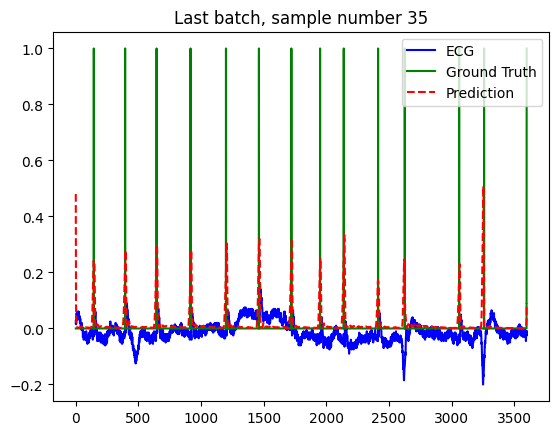

100%|██████████| 119/119 [00:17<00:00,  6.80it/s]


Learning rate:  [0.0001]

Train Loss: 0.0511
train Weighted Accuracy: 0.95013
train F1 Score: 0.88776
train TPR: 0.90072
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.09928



100%|██████████| 20/20 [00:01<00:00, 13.40it/s]



Validation Loss: 0.0504
validation Weighted Accuracy: 0.94868
validation F1 Score: 0.88384
validation TPR: 0.89783
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10217

====Epoch [31/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.84it/s]

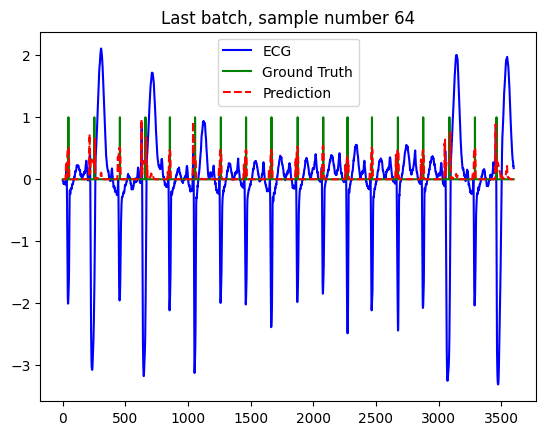

100%|██████████| 119/119 [00:18<00:00,  6.50it/s]


Learning rate:  [0.0001]

Train Loss: 0.0510
train Weighted Accuracy: 0.95036
train F1 Score: 0.88797
train TPR: 0.90117
train FPR: 0.00045
train TNR: 0.99955
train FNR: 0.09883



100%|██████████| 20/20 [00:01<00:00, 12.54it/s]



Validation Loss: 0.0503
validation Weighted Accuracy: 0.94898
validation F1 Score: 0.88415
validation TPR: 0.89843
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10157

====Epoch [32/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.81it/s]

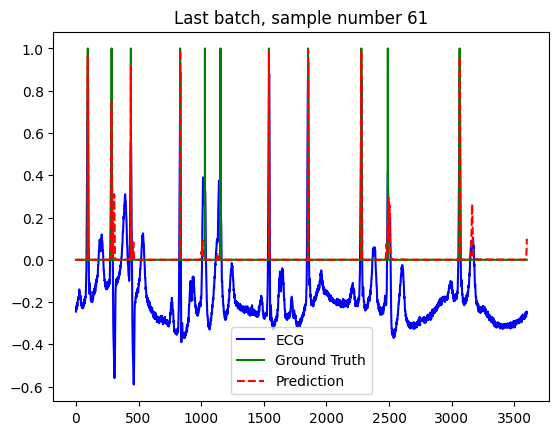

100%|██████████| 119/119 [00:18<00:00,  6.56it/s]


Learning rate:  [0.0001]

Train Loss: 0.0510
train Weighted Accuracy: 0.95065
train F1 Score: 0.88812
train TPR: 0.90176
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09824



100%|██████████| 20/20 [00:01<00:00, 12.45it/s]



Validation Loss: 0.0503
validation Weighted Accuracy: 0.94914
validation F1 Score: 0.88418
validation TPR: 0.89875
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10125

====Epoch [33/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.62it/s]

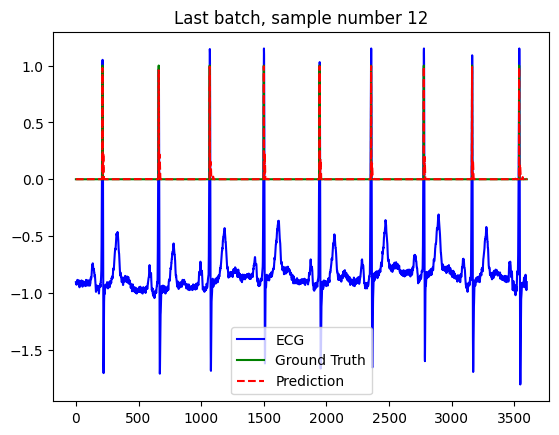

100%|██████████| 119/119 [00:17<00:00,  6.68it/s]


Learning rate:  [0.0001]

Train Loss: 0.0509
train Weighted Accuracy: 0.95088
train F1 Score: 0.88807
train TPR: 0.90221
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09779



100%|██████████| 20/20 [00:01<00:00, 11.73it/s]



Validation Loss: 0.0502
validation Weighted Accuracy: 0.94948
validation F1 Score: 0.88463
validation TPR: 0.89943
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.10057

====Epoch [34/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.70it/s]

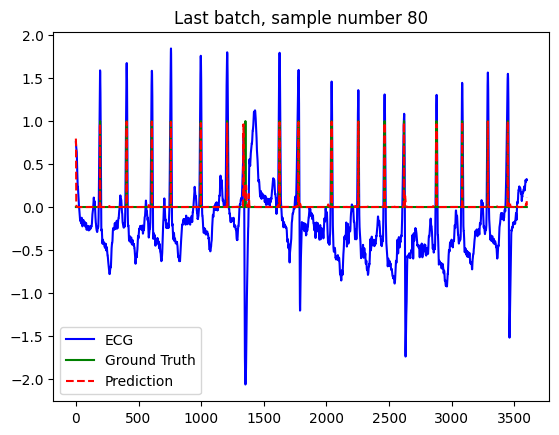

100%|██████████| 119/119 [00:18<00:00,  6.42it/s]


Learning rate:  [0.0001]

Train Loss: 0.0508
train Weighted Accuracy: 0.95112
train F1 Score: 0.88845
train TPR: 0.90269
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09731



100%|██████████| 20/20 [00:01<00:00, 12.32it/s]



Validation Loss: 0.0501
validation Weighted Accuracy: 0.94995
validation F1 Score: 0.88489
validation TPR: 0.90038
validation FPR: 0.00047
validation TNR: 0.99953
validation FNR: 0.09962

====Epoch [35/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.69it/s]

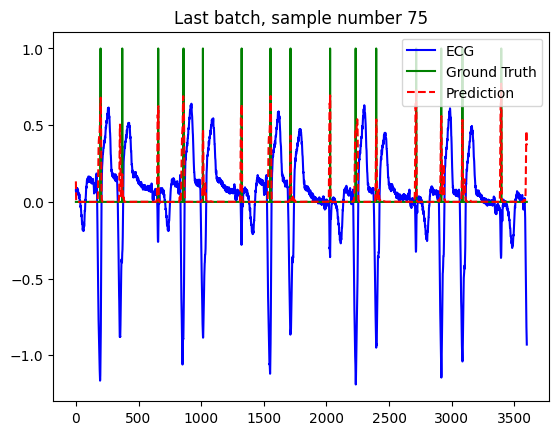

100%|██████████| 119/119 [00:17<00:00,  6.74it/s]


Learning rate:  [0.0001]

Train Loss: 0.0508
train Weighted Accuracy: 0.95157
train F1 Score: 0.88863
train TPR: 0.90360
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09640



100%|██████████| 20/20 [00:01<00:00, 12.49it/s]



Validation Loss: 0.0501
validation Weighted Accuracy: 0.95025
validation F1 Score: 0.88475
validation TPR: 0.90098
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.09902

====Epoch [36/50]====


 99%|█████████▉| 118/119 [00:17<00:00,  7.61it/s]

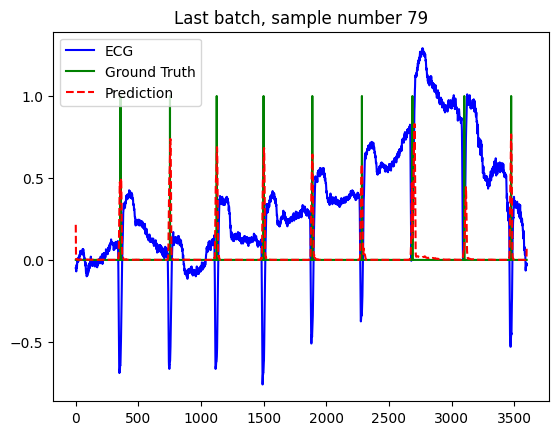

100%|██████████| 119/119 [00:18<00:00,  6.44it/s]


Learning rate:  [0.0001]

Train Loss: 0.0507
train Weighted Accuracy: 0.95186
train F1 Score: 0.88861
train TPR: 0.90418
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09582



100%|██████████| 20/20 [00:01<00:00, 12.08it/s]



Validation Loss: 0.0500
validation Weighted Accuracy: 0.95053
validation F1 Score: 0.88480
validation TPR: 0.90154
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.09846

====Epoch [37/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.81it/s]

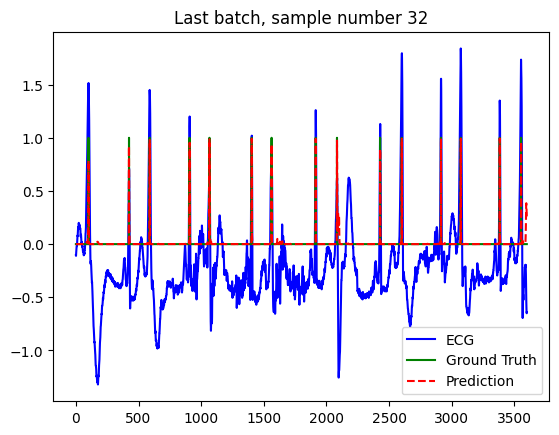

100%|██████████| 119/119 [00:17<00:00,  6.76it/s]


Learning rate:  [0.0001]

Train Loss: 0.0506
train Weighted Accuracy: 0.95217
train F1 Score: 0.88874
train TPR: 0.90480
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09520



100%|██████████| 20/20 [00:01<00:00, 12.24it/s]



Validation Loss: 0.0499
validation Weighted Accuracy: 0.95073
validation F1 Score: 0.88517
validation TPR: 0.90194
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.09806

====Epoch [38/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.74it/s]

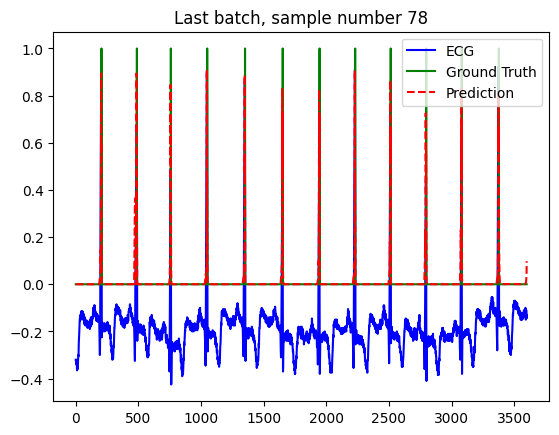

100%|██████████| 119/119 [00:17<00:00,  6.79it/s]


Learning rate:  [0.0001]

Train Loss: 0.0506
train Weighted Accuracy: 0.95234
train F1 Score: 0.88898
train TPR: 0.90514
train FPR: 0.00046
train TNR: 0.99954
train FNR: 0.09486



100%|██████████| 20/20 [00:01<00:00, 12.24it/s]



Validation Loss: 0.0499
validation Weighted Accuracy: 0.95095
validation F1 Score: 0.88506
validation TPR: 0.90238
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.09762

====Epoch [39/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.65it/s]

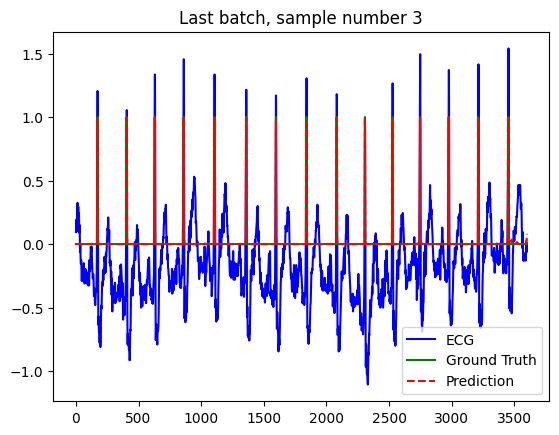

100%|██████████| 119/119 [00:18<00:00,  6.49it/s]


Learning rate:  [0.0001]

Train Loss: 0.0505
train Weighted Accuracy: 0.95257
train F1 Score: 0.88894
train TPR: 0.90560
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09440



100%|██████████| 20/20 [00:01<00:00, 12.63it/s]



Validation Loss: 0.0498
validation Weighted Accuracy: 0.95121
validation F1 Score: 0.88507
validation TPR: 0.90290
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.09710

====Epoch [40/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.82it/s]

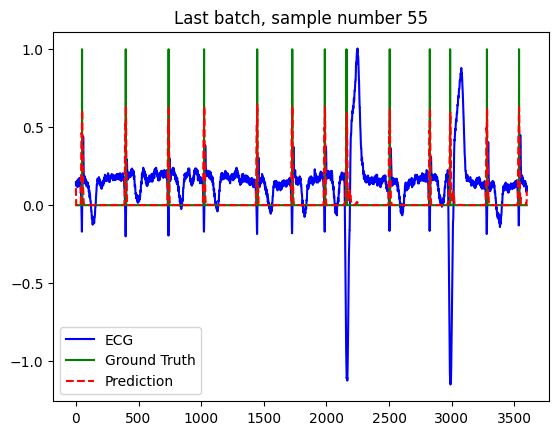

100%|██████████| 119/119 [00:17<00:00,  6.79it/s]


Learning rate:  [0.0001]

Train Loss: 0.0504
train Weighted Accuracy: 0.95281
train F1 Score: 0.88886
train TPR: 0.90608
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09392



100%|██████████| 20/20 [00:01<00:00, 13.21it/s]



Validation Loss: 0.0498
validation Weighted Accuracy: 0.95162
validation F1 Score: 0.88517
validation TPR: 0.90374
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09626

====Epoch [41/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.79it/s]

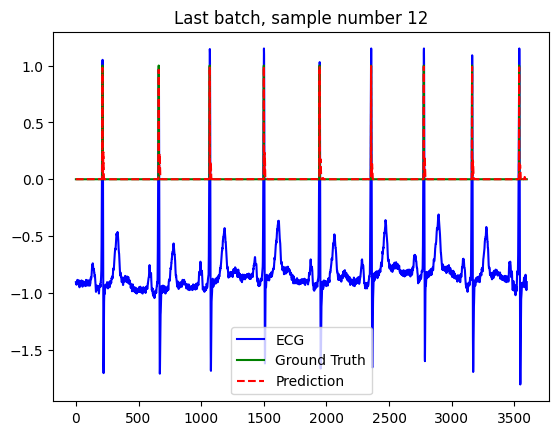

100%|██████████| 119/119 [00:18<00:00,  6.54it/s]


Learning rate:  [0.0001]

Train Loss: 0.0504
train Weighted Accuracy: 0.95297
train F1 Score: 0.88890
train TPR: 0.90642
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09358



100%|██████████| 20/20 [00:01<00:00, 12.41it/s]



Validation Loss: 0.0497
validation Weighted Accuracy: 0.95198
validation F1 Score: 0.88563
validation TPR: 0.90446
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09554

====Epoch [42/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.79it/s]

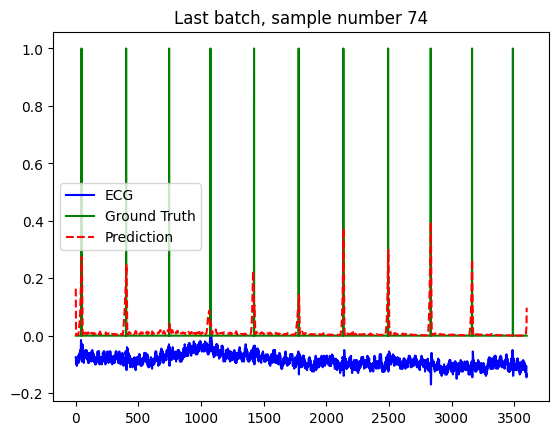

100%|██████████| 119/119 [00:17<00:00,  6.81it/s]


Learning rate:  [0.0001]

Train Loss: 0.0503
train Weighted Accuracy: 0.95320
train F1 Score: 0.88895
train TPR: 0.90687
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09313



100%|██████████| 20/20 [00:01<00:00, 12.11it/s]



Validation Loss: 0.0496
validation Weighted Accuracy: 0.95204
validation F1 Score: 0.88552
validation TPR: 0.90458
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09542

====Epoch [43/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.82it/s]

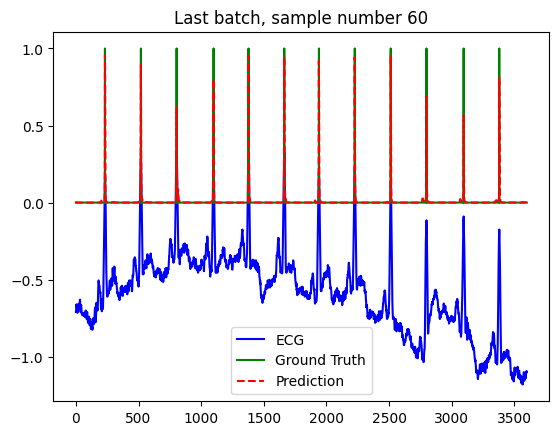

100%|██████████| 119/119 [00:18<00:00,  6.58it/s]


Learning rate:  [0.0001]

Train Loss: 0.0502
train Weighted Accuracy: 0.95341
train F1 Score: 0.88901
train TPR: 0.90730
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09270



100%|██████████| 20/20 [00:01<00:00, 12.26it/s]



Validation Loss: 0.0496
validation Weighted Accuracy: 0.95222
validation F1 Score: 0.88587
validation TPR: 0.90493
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09507

====Epoch [44/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.74it/s]

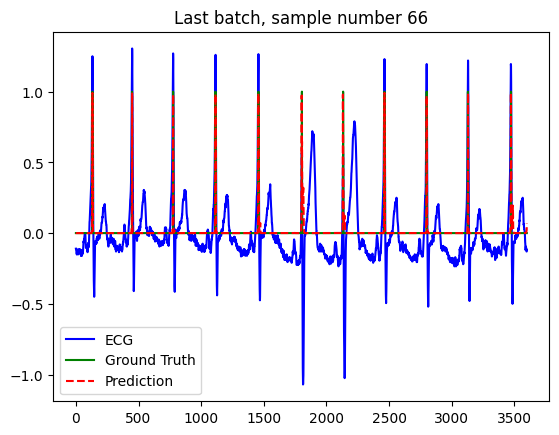

100%|██████████| 119/119 [00:17<00:00,  6.83it/s]


Learning rate:  [0.0001]

Train Loss: 0.0502
train Weighted Accuracy: 0.95365
train F1 Score: 0.88915
train TPR: 0.90778
train FPR: 0.00047
train TNR: 0.99953
train FNR: 0.09222



100%|██████████| 20/20 [00:01<00:00, 12.07it/s]



Validation Loss: 0.0495
validation Weighted Accuracy: 0.95262
validation F1 Score: 0.88596
validation TPR: 0.90573
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09427

====Epoch [45/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.75it/s]

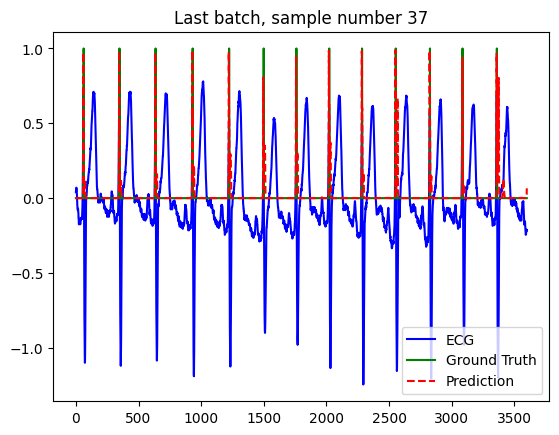

100%|██████████| 119/119 [00:17<00:00,  6.77it/s]


Learning rate:  [0.0001]

Train Loss: 0.0501
train Weighted Accuracy: 0.95389
train F1 Score: 0.88919
train TPR: 0.90825
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.09175



100%|██████████| 20/20 [00:01<00:00, 12.27it/s]



Validation Loss: 0.0495
validation Weighted Accuracy: 0.95296
validation F1 Score: 0.88607
validation TPR: 0.90641
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09359

====Epoch [46/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.66it/s]

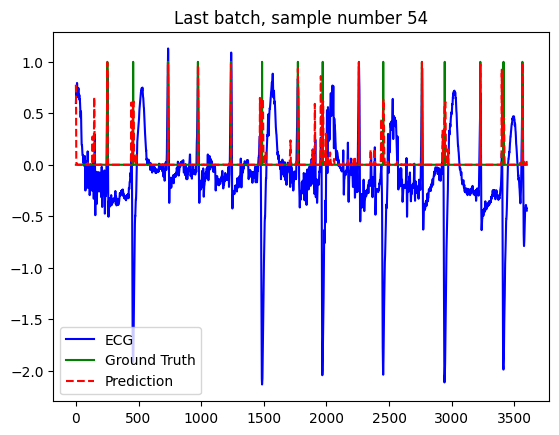

100%|██████████| 119/119 [00:18<00:00,  6.47it/s]


Learning rate:  [0.0001]

Train Loss: 0.0500
train Weighted Accuracy: 0.95412
train F1 Score: 0.88929
train TPR: 0.90871
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.09129



100%|██████████| 20/20 [00:01<00:00, 13.25it/s]



Validation Loss: 0.0494
validation Weighted Accuracy: 0.95340
validation F1 Score: 0.88655
validation TPR: 0.90729
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09271

====Epoch [47/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.78it/s]

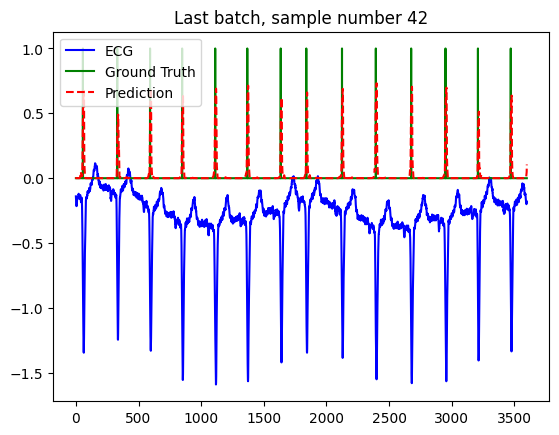

100%|██████████| 119/119 [00:17<00:00,  6.82it/s]


Learning rate:  [0.0001]

Train Loss: 0.0500
train Weighted Accuracy: 0.95444
train F1 Score: 0.88930
train TPR: 0.90937
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.09063



100%|██████████| 20/20 [00:01<00:00, 12.76it/s]



Validation Loss: 0.0493
validation Weighted Accuracy: 0.95350
validation F1 Score: 0.88633
validation TPR: 0.90749
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09251

====Epoch [48/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.78it/s]

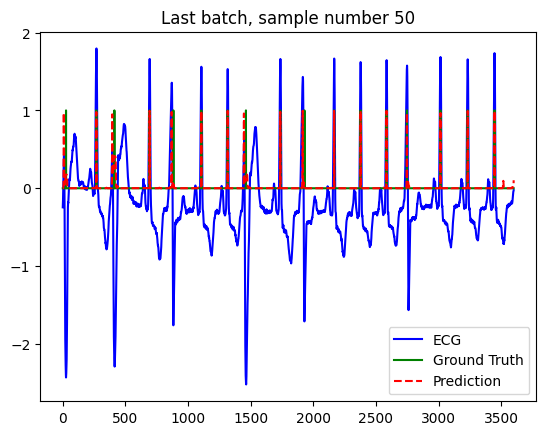

100%|██████████| 119/119 [00:18<00:00,  6.56it/s]


Learning rate:  [0.0001]

Train Loss: 0.0499
train Weighted Accuracy: 0.95465
train F1 Score: 0.88942
train TPR: 0.90978
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.09022



100%|██████████| 20/20 [00:01<00:00, 13.17it/s]



Validation Loss: 0.0493
validation Weighted Accuracy: 0.95382
validation F1 Score: 0.88664
validation TPR: 0.90813
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09187

====Epoch [49/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.73it/s]

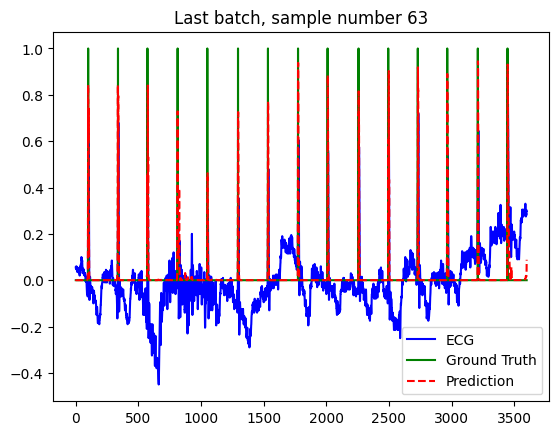

100%|██████████| 119/119 [00:17<00:00,  6.81it/s]


Learning rate:  [0.0001]

Train Loss: 0.0498
train Weighted Accuracy: 0.95494
train F1 Score: 0.88945
train TPR: 0.91036
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.08964



100%|██████████| 20/20 [00:01<00:00, 12.96it/s]



Validation Loss: 0.0492
validation Weighted Accuracy: 0.95384
validation F1 Score: 0.88671
validation TPR: 0.90817
validation FPR: 0.00049
validation TNR: 0.99951
validation FNR: 0.09183

====Epoch [50/50]====


 99%|█████████▉| 118/119 [00:16<00:00,  7.76it/s]

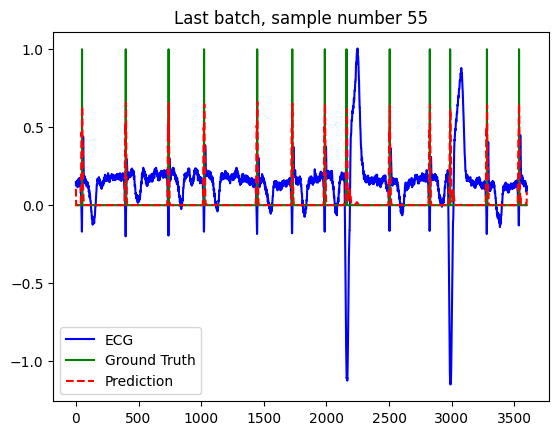

100%|██████████| 119/119 [00:18<00:00,  6.55it/s]


Learning rate:  [0.0001]

Train Loss: 0.0498
train Weighted Accuracy: 0.95492
train F1 Score: 0.88925
train TPR: 0.91032
train FPR: 0.00048
train TNR: 0.99952
train FNR: 0.08968



100%|██████████| 20/20 [00:01<00:00, 12.35it/s]



Validation Loss: 0.0492
validation Weighted Accuracy: 0.95366
validation F1 Score: 0.88643
validation TPR: 0.90781
validation FPR: 0.00050
validation TNR: 0.99950
validation FNR: 0.09219



In [10]:
model.train_model(x_train=x_train, y_train=y_train, epochs=EPOCHS, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

In [11]:
metrics = model.get_metrics()

In [12]:
with open("./metrics/raw/lstm.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

In [13]:
with open("./metrics/lstm.pkl", "rb") as f:
  metrics = pickle.load(f)

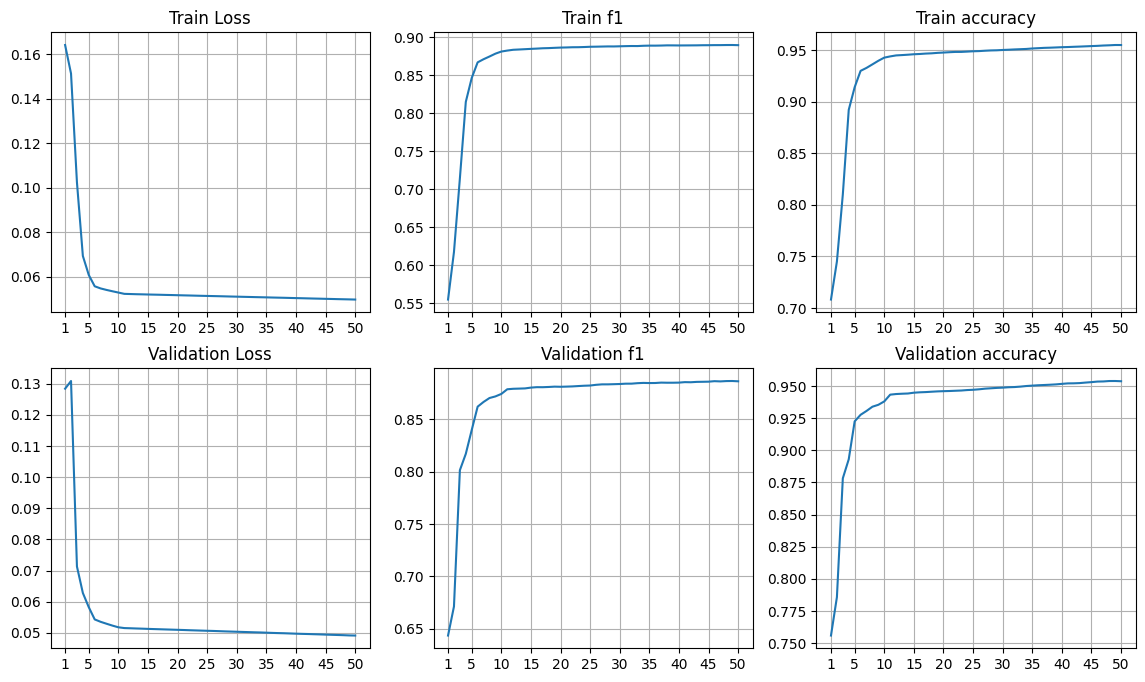

In [14]:
plot_metrics(metrics)

In [ ]:
model.train_model(x_train=x_train, y_train=y_train, epochs=2, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

  0%|          | 0/396 [00:00<?, ?it/s]

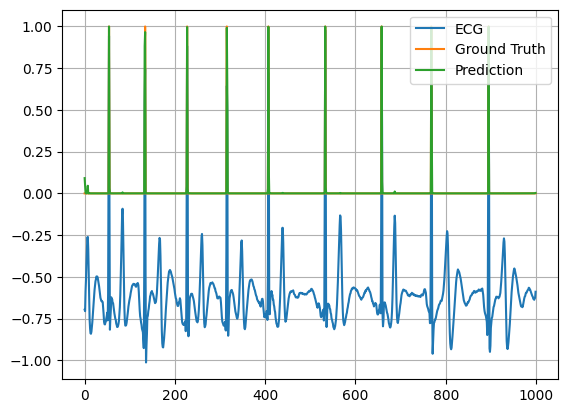

 10%|▉         | 39/396 [00:00<00:04, 76.49it/s]

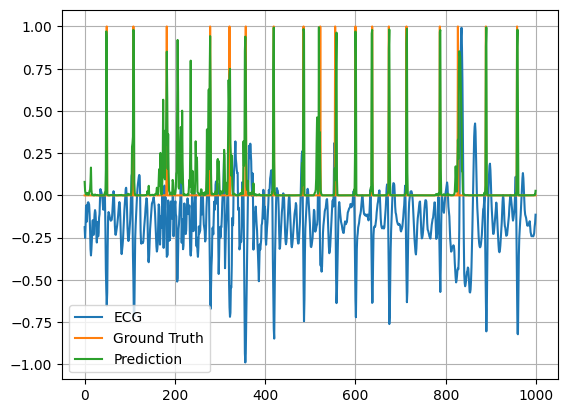

 18%|█▊        | 70/396 [00:01<00:04, 69.74it/s]

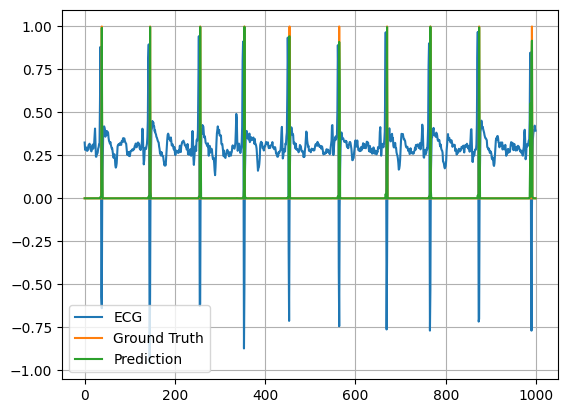

 30%|██▉       | 117/396 [00:01<00:03, 92.36it/s]

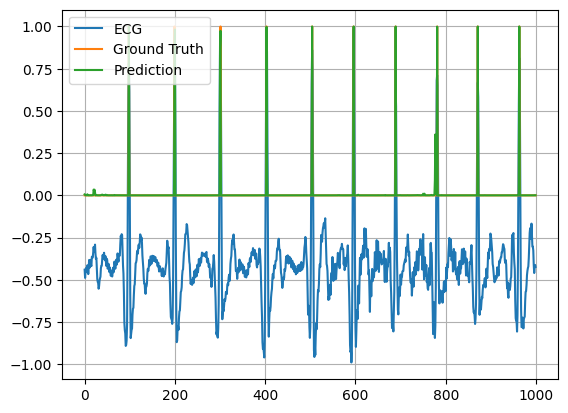

 39%|███▊      | 153/396 [00:02<00:02, 93.56it/s]

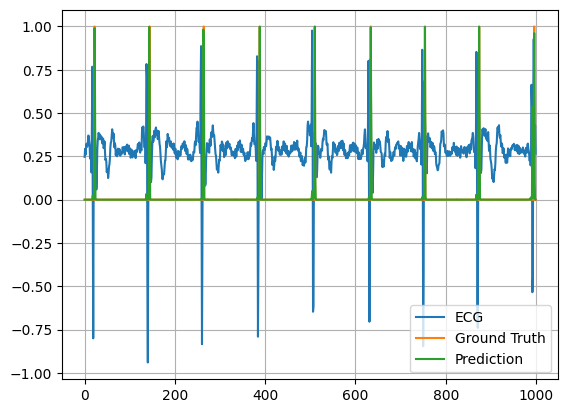

 48%|████▊     | 191/396 [00:02<00:02, 94.05it/s]

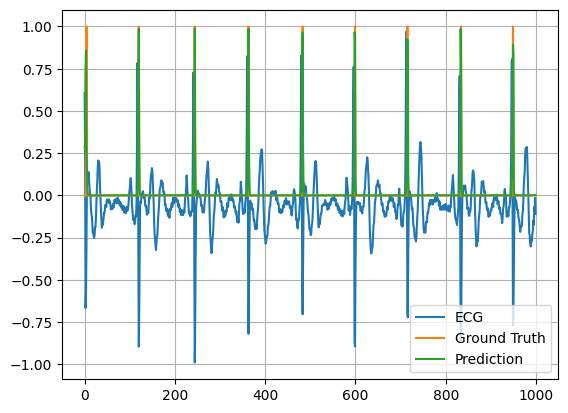

 58%|█████▊    | 229/396 [00:03<00:01, 97.80it/s]

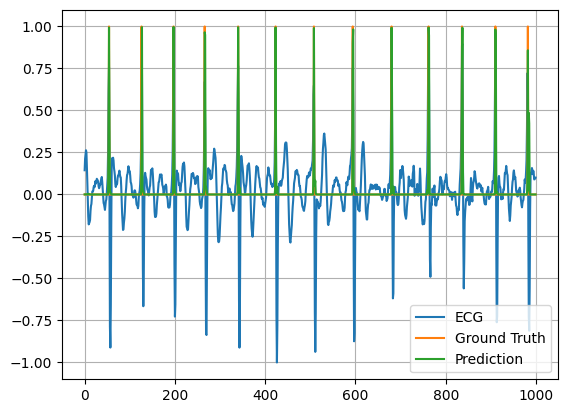

 67%|██████▋   | 265/396 [00:03<00:01, 94.93it/s]

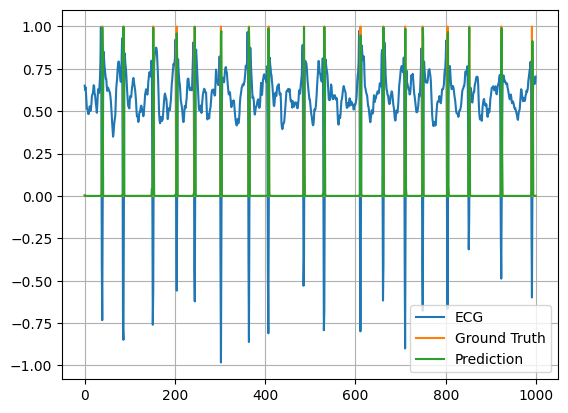

 76%|███████▋  | 302/396 [00:04<00:00, 97.09it/s]

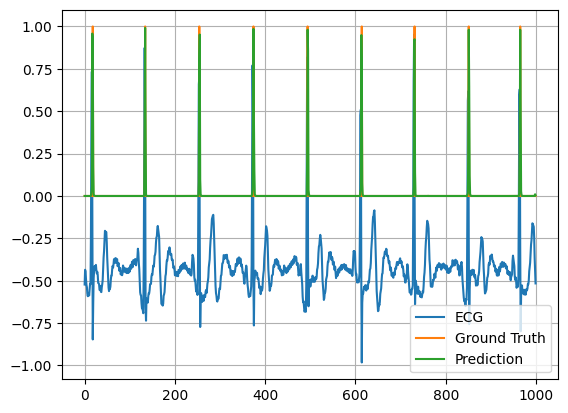

 86%|████████▌ | 339/396 [00:04<00:00, 98.29it/s]

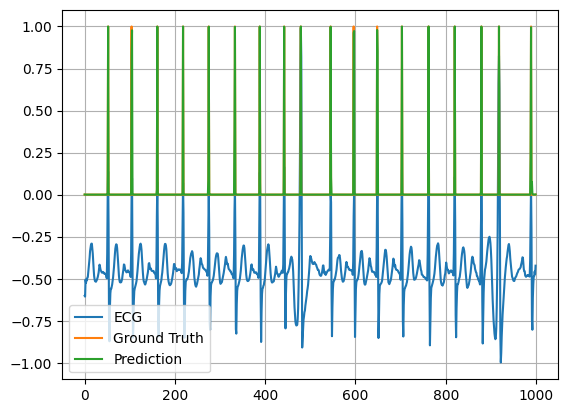

 95%|█████████▌| 377/396 [00:04<00:00, 97.90it/s]

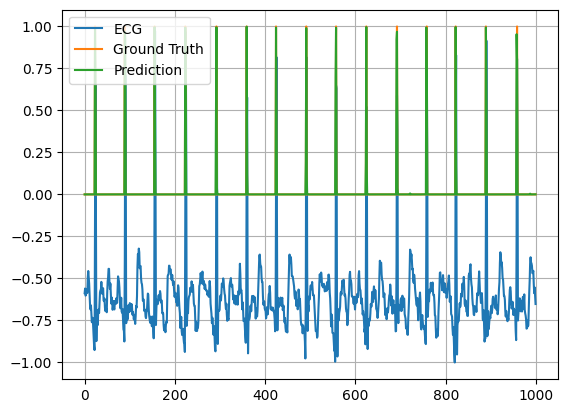

100%|██████████| 396/396 [00:05<00:00, 75.85it/s]



Test Loss: 0.0396
test Weighted Accuracy: 0.99777
test F1 Score: 0.97517
test TPR: 0.99613
test FPR: 0.00060
test TNR: 0.99940
test FNR: 0.00387



In [10]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with Apnea-ecg dataset

In [5]:
model = LSTM(input_dim=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR, loss_pos_weight=torch.Tensor([17])) #input_size == hidden features size (1-lead ECG)
model.load_state_dict(torch.load(".\\checkpoints\\lstm\\lstm_epoch_50_acc_99.80_f1_0.97.pt"))

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


<All keys matched successfully>

In [6]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(path=apnea_ecg_path+"\\dataset", is_validation_set=True)

x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

In [22]:
x , y = load_physionet_ecgs(path=apnea_ecg_path, annotation_file_extension="qrs", window_in_seconds=10, force_new=False, expand=False, denoise=True)

In [23]:
x_test = np.expand_dims(x, 2)
y_test = np.expand_dims(y, 2)

  0%|          | 0/20330 [00:00<?, ?it/s]

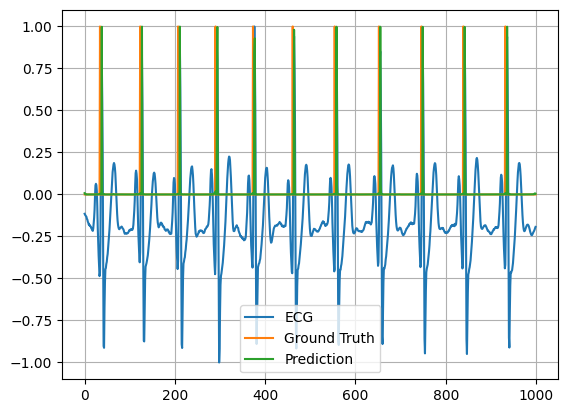

 10%|▉         | 2026/20330 [00:16<02:20, 130.70it/s]

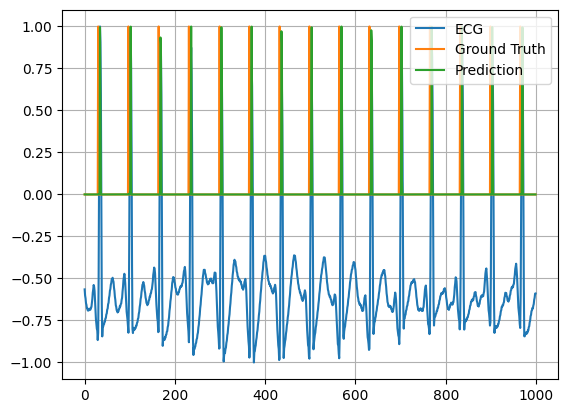

 20%|██        | 4066/20330 [00:33<02:03, 131.73it/s]

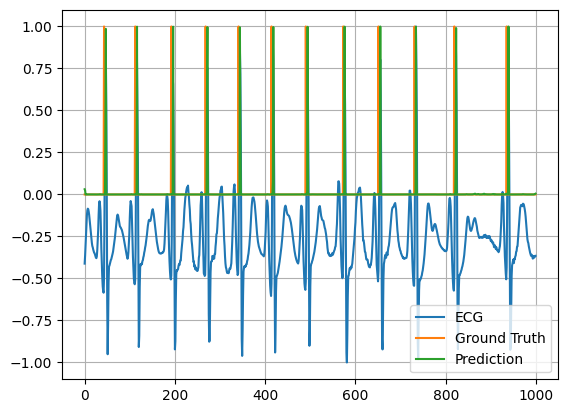

 30%|██▉       | 6090/20330 [00:50<03:00, 78.97it/s] 

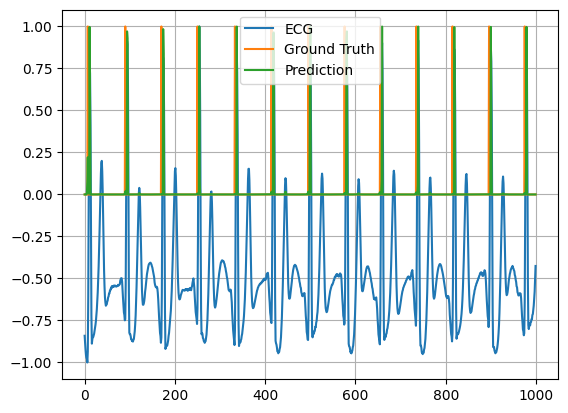

 40%|███▉      | 8121/20330 [01:06<01:33, 130.76it/s]

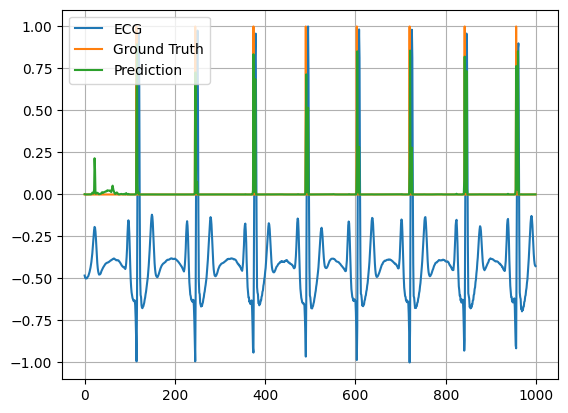

 50%|████▉     | 10160/20330 [01:22<01:22, 123.30it/s]

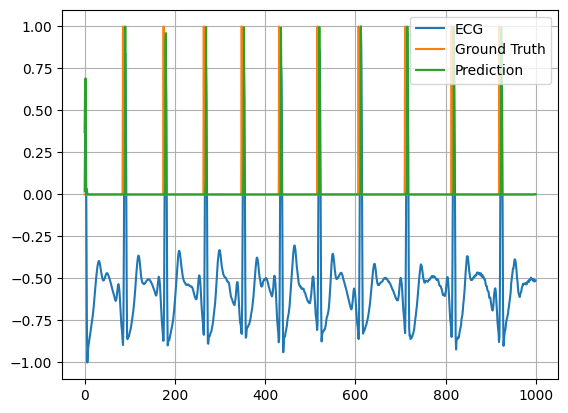

 60%|█████▉    | 12196/20330 [01:38<01:02, 130.09it/s]

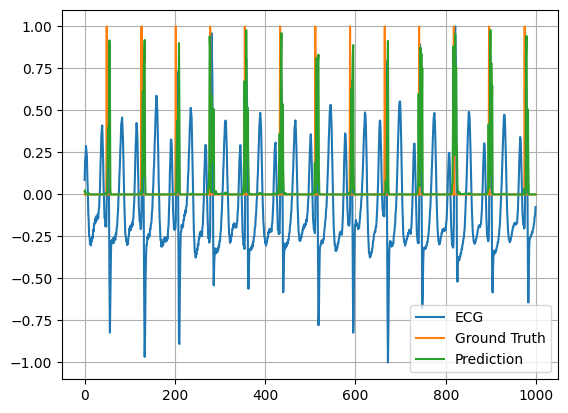

 70%|██████▉   | 14229/20330 [01:55<00:46, 130.62it/s]

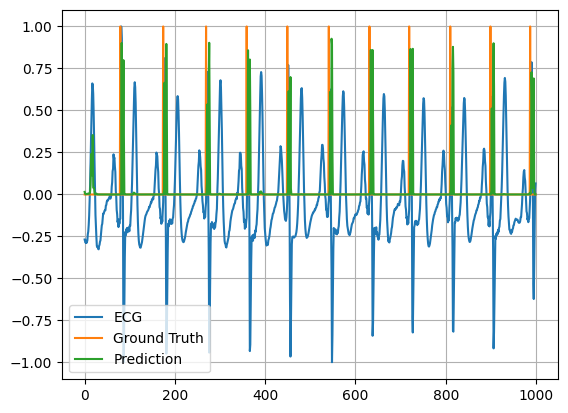

 80%|███████▉  | 16256/20330 [02:11<00:30, 133.58it/s]

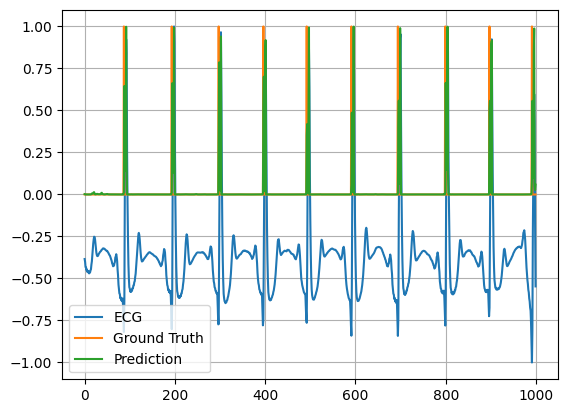

 90%|████████▉ | 18284/20330 [02:28<00:15, 133.86it/s]

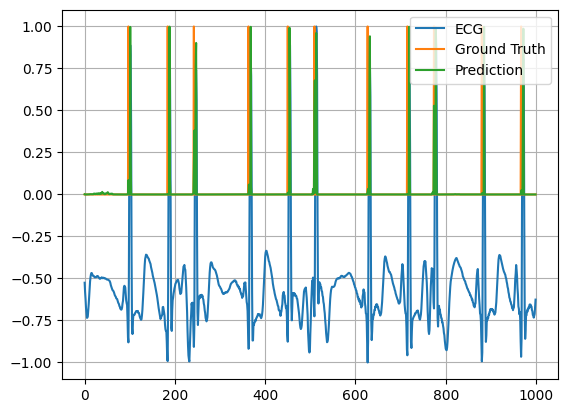

100%|██████████| 20330/20330 [02:46<00:00, 122.33it/s]



Test Loss: 1.1222
test Weighted Accuracy: 0.99441
test F1 Score: 0.89243
test TPR: 0.99139
test FPR: 0.00257
test TNR: 0.99743
test FNR: 0.00861



In [24]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with own ECG recording

In [7]:
my_test = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [8]:
ECGs = split_signal(signal=my_test, fs=250, overlap_factor=0.25, window_in_seconds=10, normalize=True, denoise=True)

In [9]:
my_X = []
my_Y = []

for ECG in ECGs:
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=250)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [14]:
model.test_model(x_test=my_X, y_test=my_Y, plot=True)

  0%|          | 0/8 [00:00<?, ?it/s]


ZeroDivisionError: integer modulo by zero

### Downsampling own ECG from 250 Hz to 100 Hz

In [15]:
from scipy.signal import resample

In [16]:
ecg_data = my_X[0]
downsampled_ecg_data = resample(ecg_data, 1000)

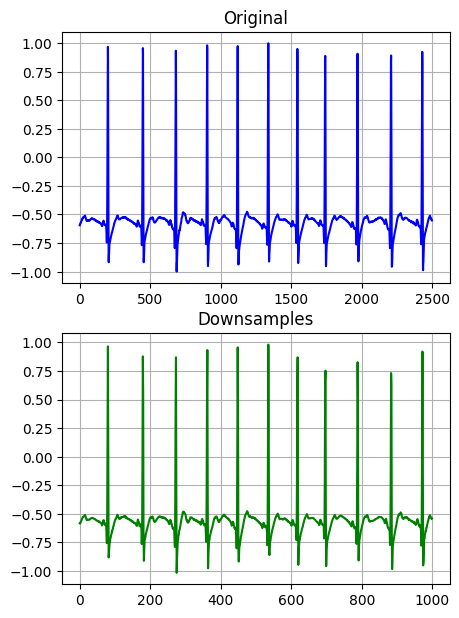

In [17]:
plt.figure(figsize=(5,15))
plt.subplot(4,1,1)
plt.plot(ecg_data, 'b-')
plt.title("Original")
plt.grid()
plt.subplot(4,1,2)
plt.plot(downsampled_ecg_data, 'g-')
plt.title("Downsamples")
plt.grid()
plt.show()

In [18]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  ECG = resample(ECG, 1000)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=100)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [19]:
model.test_model(x_test=my_X, y_test=my_Y)

100%|██████████| 8/8 [00:00<00:00, 39.02it/s]



Test Loss: 0.0157
Test Weighted Accuracy: 0.99816
Test F1 Score: 0.98164
Test TPR: 0.99671
Test FPR: 0.00040
Test TNR: 0.99960
Test FNR: 0.00329



### Result of downsampling from 250 Hz to 100 Hz
As the result of downsampling from 250 Hz to 100 Hz, the test loss function of the model is lower than the test loss function before the downsampling.

### Load additional dataset - PTB-XL

In [21]:
data = load_ptbxl(path="E:\\ml-data\\masters-thesis\\ptb-xl-v2\\WFDB", sampling_rate=100, files_num="all")
data = np.array(data)
data = np.expand_dims(data, 2)
data = torch.Tensor(data)
data = data.to(device)

100%|██████████| 9514/9514 [00:31<00:00, 297.59it/s]


In [ ]:
results = model(data)
results = torch.sigmoid(results)

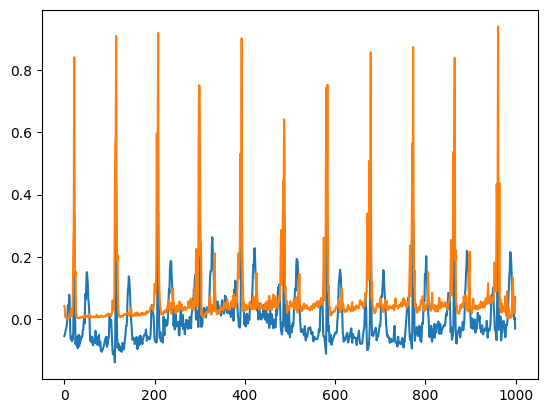

In [40]:
plt.plot(data[0].cpu())
plt.plot(results[0].cpu().detach().numpy())